# **Pràctica 2. Grafs, Topologia i Geometria Discreta** 
Enginyeria de Dades , Curs 2022-2023.

In [ ]:
#NOM: David Morillo Massagué NIU: 1666540
#NOM: Adrià Muro Gómez  NIU: 1665191

In [25]:
# Importar llibreries necessàries
import numpy as np
import sympy as sp
from sympy import *
from sympy.solvers import solve
import cmath 
import math
import matplotlib.pyplot as plt
import matplotlib as mpl
from sympy.plotting import plot_parametric
from sympy.plotting import plot3d_parametric_line
import math
%matplotlib inline
plt.rcParams['figure.dpi'] = 110 

# **FUNCIONS PRELIMINARS**

In [26]:
# Versió de Python i altres biblioteques
!python --version
print('NumPy', np.__version__)
print('Sympy', sp.__version__)
print('Matplotlib', mpl.__version__)

Python 3.7.10
NumPy 1.19.5
Sympy 1.7.1
Matplotlib 3.3.4


La idea és calcular les circunferències osculatòries i centres de la corba:
$$(e^{-t}cos(\pi t), e^{-t}sin(\pi t)).$$
Per això necessitem certs preliminars. En primer lloc definim una funció que ens doni els valors de la corba anterior en un punt determinat:

In [27]:
# Definim la variable t
t = symbols('t')
# Definim la funció
def CorbaPunt(t): 
    return (np.array([math.exp(-t)*math.cos(math.pi*t), math.exp(-t)*math.sin(math.pi*t)]))

Funció que retorna una seqüència de punts de la corba amb certa precisió

In [28]:
def Corba(Inici,Final,Precisio): 
    t=np.arange(Inici, Final+Precisio, Precisio)
    x = []
    y = []
    for i in t:
        x.append(CorbaPunt(i)[0])
        y.append(CorbaPunt(i)[1])
    return (x,y)

La gràfica de la corba és la següent:

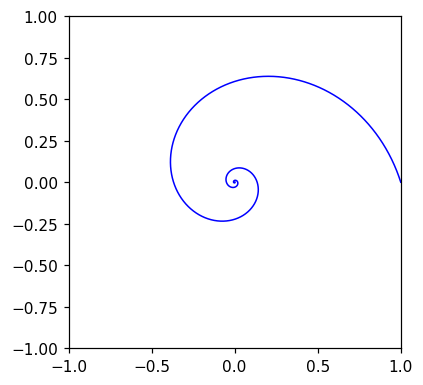

In [29]:
# Creem una nova figure i un nou axis
fig, ax = plt.subplots()

x,y=Corba(0,6,0.001)
plt.plot(x,y,'blue', linewidth=1)
plt.ylim([-1, 1]) 
plt.xlim([-1, 1]) 

# Això és per veure la corba en un rectange, i.e. per a que el rati entre l'eix de les x i el eix de les y sigui 1
ax.set_aspect('equal')

# Ajustar la mida del plot
fig.set_size_inches(4, 4)  

Ara necessitem calcular la derivada primera i segona de la funció:

In [30]:
# Definim la funció
w1 = exp(-t)*cos(pi*t)
w2 = exp(-t)*sin(pi*t)
# Calculem la derivada 
print(diff(w1,t))
print(diff(w2,t))

-pi*exp(-t)*sin(pi*t) - exp(-t)*cos(pi*t)
-exp(-t)*sin(pi*t) + pi*exp(-t)*cos(pi*t)


In [31]:
# Calculem la segona derivada
print(diff(w1,t,2))
print(diff(w2,t,2))

(2*pi*sin(pi*t) - pi**2*cos(pi*t) + cos(pi*t))*exp(-t)
(-pi**2*sin(pi*t) + sin(pi*t) - 2*pi*cos(pi*t))*exp(-t)


La funció següent calcula el mòdul.

In [32]:
def Modul(v):
    return(sqrt(v[0]**2+v[1]**2))  

El vector tangent d'una corba $\gamma$ en un punt $\gamma(t)$ ve donat per:
$$T(t) = \frac{\gamma'(t)}{\|\gamma'(t)\|}$$
La funció següent calcula el valor d'un punt al vector gradient:

In [33]:
# Utilitzem el paquet math per agilitzar els càlculs. El paquet sympy triga el triple en aquest cas.
def TangentPunt(t): 
    TP=np.array([math.pi*math.exp(-t)*math.sin(math.pi*t)-math.exp(-t)*math.cos(math.pi*t), -math.exp(-t)*math.sin(math.pi*t)+ math.pi*math.exp(-t)*math.cos(math.pi*t)])
    return (TP/Modul(TP))



El vector normal d'una corba $\gamma$ en un punt $\gamma(t)$ ve donat per la fórmula:
$$N(t) = \frac{(-y'(t), x'(t))}{\sqrt{x'(t)^2 + y'^2(t)}}$$
La funció següent permet calcular el valor d'un punt al vector normal.

In [34]:
def NormalPunt(t): 
    TN=np.array([-(-math.exp(-t)*math.sin(math.pi*t)+math.pi*math.exp(-t)*math.cos(math.pi*t)),math.pi*math.exp(-t)*math.sin(math.pi*t)-math.exp(-t)*math.cos(math.pi*t)])
    return (TN/Modul(TN))

Recordeu que la curvatura de $\gamma$ al punt $\gamma(t)$ resulta ser
$$\kappa(t) = \frac{x'(t)y''(t)- x''(t)y'(t)}{\|\gamma'(t) \|^{3}}$$
la següent funció calcula la curvatura:

In [35]:
def Kur(t): 
    return (math.pi*math.exp(-2*t)/(math.sqrt(1 + math.pi**2)*math.sqrt(math.exp(-2*t))))

L'expressió anterior es va obtenir de la següent simplificació de $\kappa(t)$ per a la corba $(e^{-t}cos(\pi t), e^{-t}sin(\pi t)).$

In [36]:
# Definim la funció
w1 = exp(-t)*cos(pi*t)
w2 = exp(-t)*sin(pi*t)
# Fórmula de la curvatura
(diff(w1,t,1)*diff(w2,t,2) - diff(w1,t,2)*diff(w2,t,1))/sqrt((diff(w1,t,1)**2 + diff(w2,t,1)**2))**(3)  
# Simplifiquem
simplify((diff(w1,t,1)*diff(w2,t,2) - diff(w1,t,2)*diff(w2,t,1))/sqrt((diff(w1,t,1)**2 + diff(w2,t,1)**2))**(3))

pi/(sqrt(1 + pi**2)*sqrt(exp(-2*t)))

La funció següent dóna els punts d'una circumferència amb ràdio $r$ i centre $t$.

In [37]:
def Cercle(t,r): 
    return (np.array([r*math.cos(t),r*math.sin(t)]))


Funció longitud de la corba entre dos valors del paràmetre amb certa precisió

In [38]:
def Longitud(a,b,Precisio):
    L=0
    #Afegim b+Precisio perquè faci realment de a fins a b
    punts=np.arange(a, b, Precisio)
    for i in punts:
        L=L+Modul(np.array(CorbaPunt(i+Precisio))-np.array(CorbaPunt(i)))
    return(L)

Funció per dibuixar una circunferència amb centre $punt$ i radi $r$, amb una precisió $Precisio$.

In [39]:
def GraficarCircunferencia(a,b,Precisio,punt,r):
    punts=np.arange(a, b+Precisio, Precisio)
    lp=len(punts)-1
    p1=np.empty(lp, dtype=object)
    p2=np.empty(lp, dtype=object)
    for i in range(lp):
        p1[i]=Cercle(punts[i],r)[0]+punt[0]
        p2[i]=Cercle(punts[i],r)[1]+punt[1]
    plt.plot(p1,p2,color="red")

Prova de com dibuixa

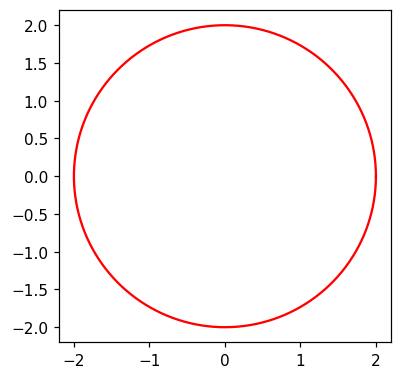

In [40]:
# Create a new figure and axis
fig, ax = plt.subplots()

GraficarCircunferencia(0,2*math.pi,0.01,[0,0],2)

# Set the aspect ratio to be equal
ax.set_aspect('equal')


# **Circunferències osculatòries**

Ara només resta aplicar les funcions que definim a la secció anterior. 

In [41]:
# Preparem els punts amb la precisió que volem 
a=0
b=pi/2
# Recomendación: use un valor de division pequeño para optimizar el tiempo de espera. Tan pronto vea que funciona incrementelo.
Precisio=pi/100
punts=np.arange(a, b, Precisio)
lp=len(punts)-1

Dibuixem les centres de las circunferències osculatòries

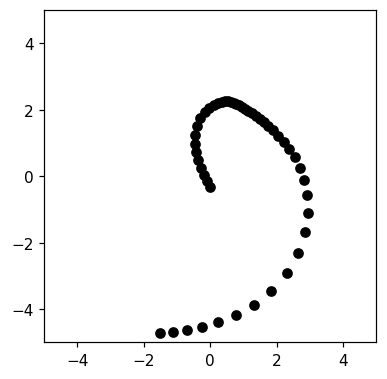

In [42]:
# Create a new figure and axis
fig, ax = plt.subplots()
for i in range(lp):   
    desplaz=(1/Kur(punts[i]))*NormalPunt(punts[i])
    c=CorbaPunt(punts[i])+desplaz
    plt.plot(c[0],c[1], marker = 'o',color="black")
    plt.ylim([-5, 5]) # ajuste estos valores para visualizar la curva en caso de cambiarla
    plt.xlim([-5, 5]) # ajuste estos valores para visualizar la curva en caso de cambiarla

# Set the aspect ratio to be equal
ax.set_aspect('equal')

Dibuixem les circunferències osculatòries

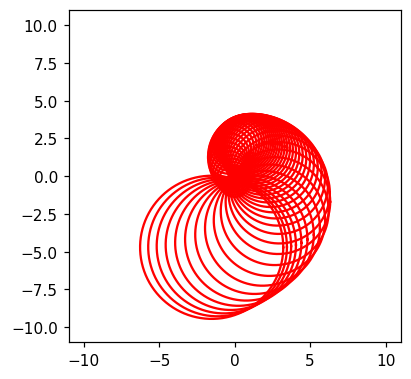

In [43]:
# Create a new figure and axis
fig, ax = plt.subplots()

for i in range(lp):
    desplaz=(1/Kur(punts[i]))*NormalPunt(punts[i])
    c=CorbaPunt(punts[i])+desplaz
    GraficarCircunferencia(0,2*pi,0.01,c,1/Kur(punts[i]))
    plt.ylim([-11, 11]) # ajuste estos valores para visualizar la curva en caso de cambiarla
    plt.xlim([-11, 11]) # ajuste estos valores para visualizar la curva en caso de cambiarla
    
# Set the aspect ratio to be equal
ax.set_aspect('equal')

Dibuixem le corba i les circunferències osculatòries i centres.

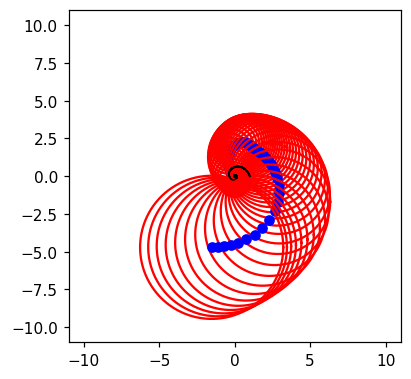

In [44]:
# Create a new figure and axis
fig, ax = plt.subplots()

for i in range(lp):
    desplaz=(1/Kur(punts[i]))*NormalPunt(punts[i])
    c=CorbaPunt(punts[i])+desplaz
    GraficarCircunferencia(0,2*pi,0.01,c,1/Kur(punts[i]))
    plt.plot(c[0],c[1], marker = 'o',color="blue")
    x,y=Corba(0,2*math.pi,0.001)
    plt.plot(x,y,'black', linewidth=1)
    plt.ylim([-11, 11]) # ajuste estos valores para visualizar la curva en caso de cambiarla
    plt.xlim([-11, 11]) # ajuste estos valores para visualizar la curva en caso de cambiarla
    
# Set the aspect ratio to be equal
ax.set_aspect('equal')

# **Problemes per entregar**
Per tal de poder avaluar la pràctica s'han de resoldre els següents  exercicis.

## **Exercici** 
Per a la corba $(2cos(t), sin(t))$ realitzeu el següent:
1. Dibuixeu la corba.
2. Calculeu el vector tangent, normal i la curvatura.
3. Dibuixeu els centres de les circumferències osculatòries.
4. Dibuixeu les circunferències osculatòries.

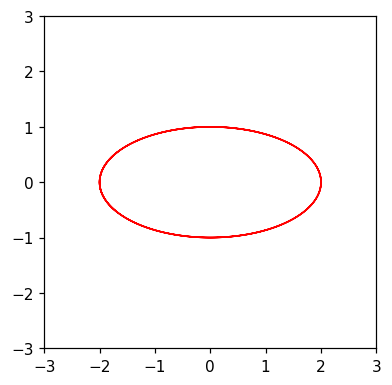

In [45]:
#### resuelva el ejercicio despues de esta linea
#DIBUIXEU LA CORBA

t = symbols('t')

def CorbaPunt(t): 
    return (np.array([2*math.cos(t), math.sin(t)]))

def Corba(Inici,Final,Precisio): 
    t=np.arange(Inici, Final+Precisio, Precisio)
    x = []
    y = []
    for i in t:
        x.append(CorbaPunt(i)[0])
        y.append(CorbaPunt(i)[1])
    return (x,y)

fig, ax = plt.subplots()

x,y=Corba(-10,10,0.001)
plt.plot(x,y,'red', linewidth=1)
plt.ylim([-3, 3]) 
plt.xlim([-3, 3]) 

ax.set_aspect('equal')
fig.set_size_inches(4, 4)

In [46]:
#CALCULEU EL VECTOR TANGENT, NORMAL I LA CURVATURA
def Modul(v):
    return(sqrt(v[0]**2+v[1]**2))  

def TangentPunt(t): 
    TP=np.array([-2*math.sin(t),math.cos(t)])
    return (TP/Modul(TP))

def NormalPunt(t): 
    TN=np.array([-(math.cos(t)), -2*math.sin(t)])
    return (TN/Modul(TN))

def Kur(t): 
    TK=-2*math.sin(t)*(-(math.sin(t)))+2*math.cos(t)*math.cos(t)
    TKden=np.array([-2*math.sin(t),math.cos(t)])
    return (TK/(Modul(TKden)**3))

v1 = 2*cos(t)
v2 = sin(t)

print("Primera derivada v1: ",diff(v1,t))
print("Primera derivada v2: ",diff(v2,t))
print("-"*100)
print("Segona derivada v1: ",diff(v1,t,2))
print("Segona derivada v2: ",diff(v2,t,2))

Primera derivada v1:  -2*sin(t)
Primera derivada v2:  cos(t)
----------------------------------------------------------------------------------------------------
Segona derivada v1:  -2*cos(t)
Segona derivada v2:  -sin(t)


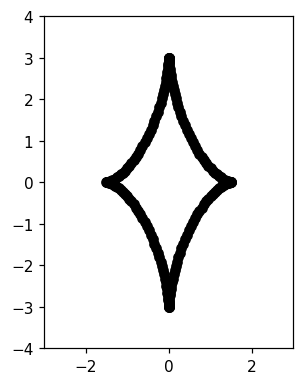

In [47]:
#DIBUIXEU ELS CENTRES DE LES CIRCUMFERÈNCIES OSCULATÒRIES

 
a=0
b=2*pi
Precisio=pi/100
punts=np.arange(a, b, Precisio)
lp=len(punts)-1

fig, ax = plt.subplots()
for i in range(lp): 
    
    desplaz=(1/Kur(punts[i]))*NormalPunt(punts[i])
    c=CorbaPunt(punts[i])+desplaz
    plt.plot(c[0],c[1], marker = 'o',color="black")
    plt.ylim([-4, 4]) 
    plt.xlim([-3, 3]) 


ax.set_aspect('equal')
fig.set_size_inches(4, 4)

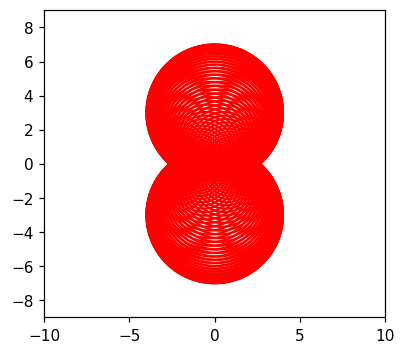

In [48]:
#DIBUIXEU LES CIRCUMFERÈNCIES OSCULATÒRIES

def Cercle(t,r): 
    return (np.array([r*math.cos(t),r*math.sin(t)]))

def Longitud(a,b,Precisio):
    L=0
    #Afegim b+Precisio perquè faci realment de a fins a b
    punts=np.arange(a, b, Precisio)
    for i in punts:
        L=L+Modul(np.array(CorbaPunt(i+Precisio))-np.array(CorbaPunt(i)))
    return(L)

def GraficarCircunferencia(a,b,Precisio,punt,r):
    punts=np.arange(a, b+Precisio, Precisio)
    lp=len(punts)-1
    p1=np.empty(lp, dtype=object)
    p2=np.empty(lp, dtype=object)
    for i in range(lp):
        p1[i]=Cercle(punts[i],r)[0]+punt[0]
        p2[i]=Cercle(punts[i],r)[1]+punt[1]
    plt.plot(p1,p2,color="red")
    
    
fig, ax = plt.subplots()

for i in range(lp):
    desplaz=(1/Kur(punts[i]))*NormalPunt(punts[i])
    c=CorbaPunt(punts[i])+desplaz
    GraficarCircunferencia(0,2*pi,0.01,c,1/Kur(punts[i]))
    plt.ylim([-9, 9]) # ajuste estos valores para visualizar la curva en caso de cambiarla
    plt.xlim([-10, 10]) # ajuste estos valores para visualizar la curva en caso de cambiarla
    
# Set the aspect ratio to be equal
ax.set_aspect('equal')
fig.set_size_inches(4, 4)

# **Recursos addicionals**
---
Els següents enllaços corresponen a llocs on trobareu informació molt útil per aprofundir en el coneixement de les funcionalitats de la llibreries usades: \
[Python](https://www.python.org/) \
[SymPy](https://docs.sympy.org/latest/index.html) \
[NumPy](https://numpy.org/)

**Felicitacions!** Ha acabat la Pràctica. Bona feina!

## **Entrega**

Per lliurar el notebook si us plau feu el següent:
1. Descarregueu el notebook (`Archivo` -> `Descargar .ipynb`).
2. Introduïu al *Campus Virtual*.
3. Feu l'enviament del *notebook* que heu descarregat.